## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Importing the required python packages.

In [ ]:
# Importing all required python packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Mounting Drive for dataset path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path for our dataset
dir_path = '/content/drive/MyDrive/Almabetter/Capstone Projects/Airbnb Booking Analysis - Anas Malik/dat/'

# Creating dataframe from the dataset

In [ ]:
df = pd.read_csv(dir_path + 'Airbnb NYC 2019.csv')

In [ ]:
# Basic description of data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Basic Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Top 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Last 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# All columns in the dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Creating a copy a our dataframe so that changes should not reflect in original dataframe
new_df = df.copy()
new_df.shape

(48895, 16)

# Q1. What can we learn about different hosts and areas?

In [ ]:
# Extracting all those values only where provider's name(host_name) is not null
hosts_non_null_values_df = new_df.loc[~new_df['host_name'].isna(), :]
hosts_non_null_values_df.shape

(48874, 16)

In [ ]:
# Creating a dataframe by extraction host name with their respective areas
hosts_with_their_areas_df = hosts_non_null_values_df[['host_name', 'neighbourhood_group']]

In [ ]:
# Counting the number of values on above dataframe
hosts_with_their_areas_df.value_counts()

host_name       neighbourhood_group
Sonder (NYC)    Manhattan              327
Blueground      Manhattan              230
Michael         Manhattan              212
David           Manhattan              202
Michael         Brooklyn               159
                                      ... 
Jayd            Manhattan                1
Jayden          Manhattan                1
Jayden & Minea  Brooklyn                 1
Jaye            Manhattan                1
현선              Manhattan                1
Length: 15343, dtype: int64

### We can learn that most of the listings are from Manhattan area from different hosts. The top four hosts for Manhattan area are Sonder (NYC), Blueground, Michael, David.

# Q2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
new_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## First let's look on area with their mean prices

In [ ]:
# Creating a dataframe by groupby on area(neighbourhood_group) and taking the mean of prices 
locations_prices_df = new_df.groupby('neighbourhood_group')['price'].mean().reset_index()

In [ ]:
locations_prices_df.rename(columns={'price': 'mean_price'}, inplace=True)
locations_prices_df

,neighbourhood_group,mean_price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


In [ ]:
# Setting the figure size
plt.rcParams['figure.figsize'] = (10, 5)

Text(0, 0.5, 'Prices')

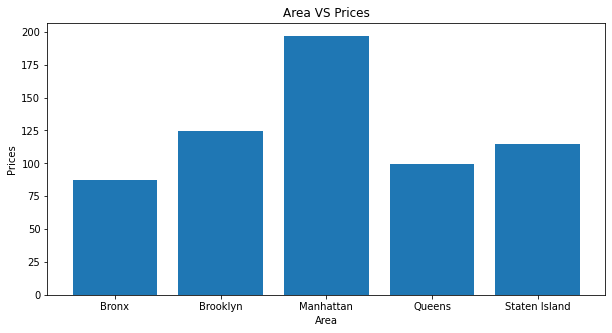

In [ ]:
# Creating bar chart for Area VS Prices
plt.bar(locations_prices_df['neighbourhood_group'], locations_prices_df['mean_price'])

plt.title("Area VS Prices")
plt.xlabel("Area")
plt.ylabel("Prices")

### As we can see from above figure that the average price in Manhattan is more when compare to other areas.

## Now lets look on locations and their reviews

In [ ]:
new_df[['neighbourhood_group', 'number_of_reviews']].head()

,neighbourhood_group,number_of_reviews
0,Brooklyn,9
1,Manhattan,45
2,Manhattan,0
3,Brooklyn,270
4,Manhattan,9


In [ ]:
# Creating a dataframe by groupby on area(neighbourhood_group) and taking the maximum number of reviews for the area
area_no_of_reviews_df = new_df.groupby('neighbourhood_group')['number_of_reviews'].max().reset_index()

In [ ]:
area_no_of_reviews_df

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


Text(0, 0.5, 'Number of Reviews')

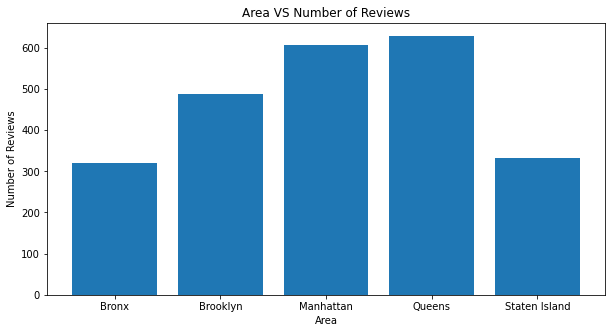

In [ ]:
# creating a bar chart for Area VS Number of Reviews
plt.bar(area_no_of_reviews_df['neighbourhood_group'], area_no_of_reviews_df['number_of_reviews'])

plt.title("Area VS Number of Reviews")
plt.xlabel("Area")
plt.ylabel("Number of Reviews")

### As we can see from the above chart that Queens and Manhattan have maximum number of reviews than others. It can be because these areas have more number of public attraction or tourist places.

## Now lets look on prices and number of reviews

In [ ]:
# Creating a dataframe by groupby on price and also taking number of reviews
price_no_of_reviews = new_df.groupby('price')['number_of_reviews'].max().reset_index()

In [ ]:
price_no_of_reviews.head()

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


Text(0, 0.5, 'Number of Reviews')

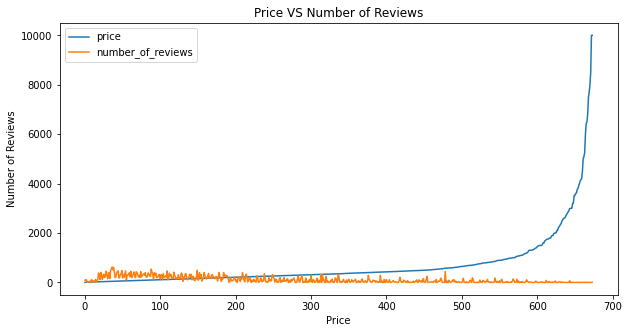

In [ ]:
# plotting a line chart Price VS Number of Reviews
price_no_of_reviews.plot()

plt.title("Price VS Number of Reviews")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")

### We can see that the number of reviews from people are very high when prices are low and number of review decreases as the prices increases. It means people prefer to stay in those hotels where prices are low.

# Q3. Which hosts are the busiest and why?

In [ ]:
new_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
new_df[['host_name','host_id','room_type', 'number_of_reviews']].head(5)

,host_name,host_id,room_type,number_of_reviews
0,John,2787,Private room,9
1,Jennifer,2845,Entire home/apt,45
2,Elisabeth,4632,Private room,0
3,LisaRoxanne,4869,Entire home/apt,270
4,Laura,7192,Entire home/apt,9


In [ ]:
# Creating a dataframe for busiest hosts by groupby on hosts and room type and also taking number of reviews for that host
busiest_hosts_df = new_df.groupby(['host_name', 'room_type'])['number_of_reviews'].max().reset_index().sort_values('number_of_reviews', ascending=False).head()

In [ ]:
busiest_hosts_df

,host_name,room_type,number_of_reviews
3434,Dona,Private room,629
6333,Jj,Private room,607
8978,Maya,Private room,543
2164,Carol,Private room,540
2975,Danielle,Private room,510


Text(0, 0.5, 'Number of Reviews')

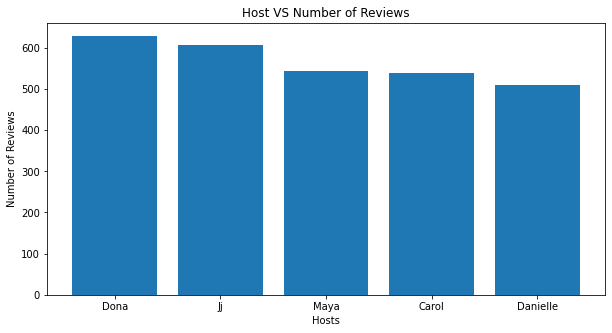

In [ ]:
# plotting a bar chart for Hosts Vs Number of Reviews
x_axis = busiest_hosts_df['host_name']
y_axis = busiest_hosts_df['number_of_reviews']

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axis, y_axis)
plt.title("Host VS Number of Reviews")
plt.xlabel("Hosts")
plt.ylabel("Number of Reviews")

###The Top five busiest hosts are: **Dona**, **Jj**, **Maya**, **Carol** and Danielle

###Because these hosts provides more number of private room as room type and most of the people prefer private rooms rather than doormatry/sharing room.

# Q4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
new_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
new_df[['neighbourhood_group', 'minimum_nights']].sort_values('minimum_nights', ascending=False).head()

,neighbourhood_group,minimum_nights
5767,Manhattan,1250
2854,Manhattan,1000
38664,Manhattan,999
13404,Manhattan,999
26341,Brooklyn,999


In [ ]:
# creating a dataframe where people stay longer
areas_with_traffic_df = new_df.groupby(['neighbourhood_group', 'room_type'])['minimum_nights'].count().reset_index().sort_values('minimum_nights', ascending=False)

In [ ]:
areas_with_traffic_df

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


Text(0, 0.5, 'Minimum Nights')

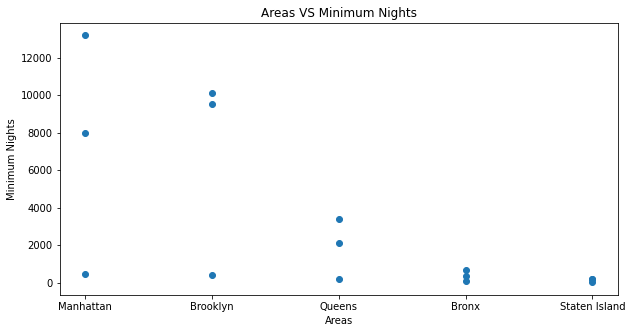

In [ ]:
# plotting a scatter graph
plt.scatter(areas_with_traffic_df['neighbourhood_group'], areas_with_traffic_df['minimum_nights'])

plt.title("Areas VS Minimum Nights")
plt.xlabel("Areas")
plt.ylabel("Minimum Nights")

Text(0, 0.5, 'Minimum Nights')

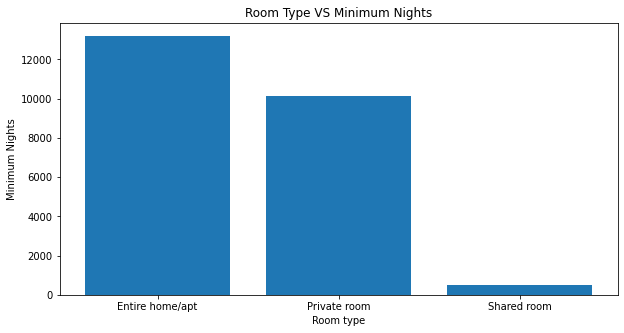

In [ ]:
# plotting a boxplt
plt.bar(areas_with_traffic_df['room_type'], areas_with_traffic_df['minimum_nights'])

plt.title("Room Type VS Minimum Nights")
plt.xlabel("Room type")
plt.ylabel("Minimum Nights")

### We can see the noticeable difference that more traffic is in the areas like Manhattan, Brooklyn and Queens. In these Areas people are prefering Entire home/apt for longer stay and private room for shorter stay.

# Conclusion:



*   Most of the people don't want to pay more on their stay. They prefer cheap prices.
*   If people are staying for a long time, they prefer Entire home/apt room type.
*  If people are staying for short time, they prefer private room as room type.
*  Big cities like Manhattan, Brooklyn and Queens have more traffic and hence have more number of reviews.

